In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
google=pd.read_csv("C:/Class/Monte carlo/project/GOOGL.csv",index_col='Date',parse_dates=True)
google.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
google.rename(columns={'Adj Close':'GOOGL'},inplace=True)

In [3]:
type(google)

pandas.core.frame.DataFrame

In [4]:
intel=pd.read_csv("C:/Class/Monte carlo/project/INTC.csv",index_col='Date',parse_dates=True)
intel.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
intel.rename(columns={'Adj Close':'INTL'},inplace=True)


In [5]:
johnson=pd.read_csv("C:/Class/Monte carlo/project/JNJ.csv",index_col='Date',parse_dates=True)
johnson.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
johnson.rename(columns={'Adj Close':'JJ'},inplace=True)


In [6]:
toyota=pd.read_csv("C:/Class/Monte carlo/project/TM.csv",index_col='Date',parse_dates=True)
toyota.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
toyota.rename(columns={'Adj Close':'TOY'},inplace=True)

In [7]:
portfolio=pd.concat([google,intel,johnson,toyota],axis=1)

In [8]:
portfolio.head()

,GOOGL,INTL,JJ,TOY
Date,,,,
2014-04-17,534.632141,23.439812,86.352402,92.458313
2014-04-21,527.172668,23.361790,87.259903,92.988976
2014-04-22,533.345703,23.266438,87.416962,92.800674
2014-04-23,525.497253,23.188421,87.451874,92.569572
2014-04-24,523.722107,23.188421,87.225006,91.619484


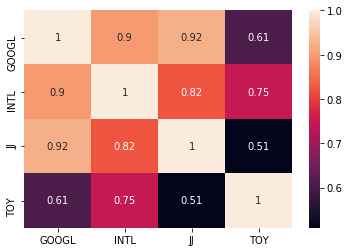

In [9]:
sns.heatmap(portfolio.corr(),annot=True)

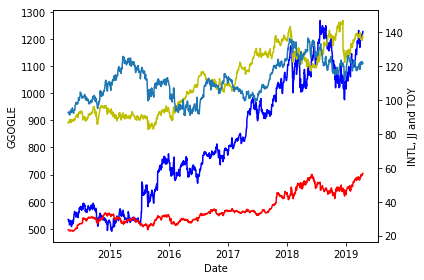

In [10]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('GGOGLE')
ax1.plot(portfolio['GOOGL'],'b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('INTL, JJ and TOY')  # we already handled the x-label with ax1
ax2.plot(portfolio['INTL'],'r')
ax2.plot(portfolio['JJ'],'y')
ax2.plot(portfolio['TOY'])
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179928B00F0>,
      dtype=object)

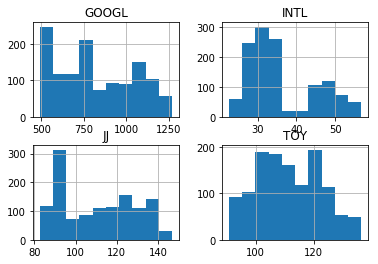

In [11]:
portfolio.hist()

In [12]:
log_ret=np.log(portfolio/portfolio.shift(1))


In [13]:
log_ret
log_ret.describe()

,GOOGL,INTL,JJ,TOY
count,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000661,0.000703,0.000373,0.000219
std,0.014516,0.015815,0.010024,0.011721
min,-0.054645,-0.095432,-0.105781,-0.062797
25%,-0.006104,-0.007499,-0.004194,-0.005800
50%,0.000566,0.000943,0.000388,0.000341
75%,0.008227,0.008671,0.005905,0.006877
max,0.148872,0.100315,0.048395,0.050474


In [14]:
port_cov=log_ret.corr()
print(port_cov)

          GOOGL      INTL        JJ       TOY
GOOGL  1.000000  0.442872  0.370000  0.428430
INTL   0.442872  1.000000  0.355773  0.403426
JJ     0.370000  0.355773  1.000000  0.365957
TOY    0.428430  0.403426  0.365957  1.000000


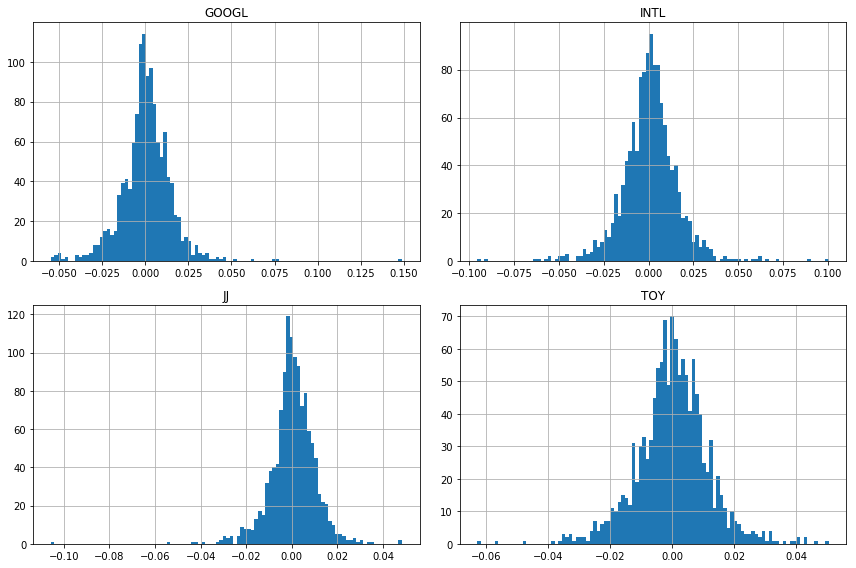

In [15]:
log_ret.hist(figsize=(12,8),bins=100)
plt.tight_layout()

In [18]:
########################
number_port=5000
all_weights=np.zeros((number_port,len(portfolio.columns)))
return_arr=np.zeros(number_port)
volatility_arr=np.zeros(number_port)
sharperatio_arr=np.zeros(number_port)
for i in range(number_port):
    #weights
    weights=np.array(np.random.random(4))
    #rebalance weights
    weights=weights/np.sum(weights)
    #save weights
    all_weights[i,:]=weights
    #expected returns
    return_arr[i]=np.sum((log_ret.mean()*weights)*252)
    #expected volatility
    volatility_arr[i]=np.sqrt(np.dot(weights.T,np.dot(port_cov,weights)))
    #sharpe ratio
    sharperatio_arr[i]=return_arr[i]/volatility_arr[i]
    #####################################

In [19]:
ValueAtRisk=[]
ExpectedShortfall=[]
MeanReturn=[]
StandardDeviation=[]

number_port=5000
all_weights=np.zeros((number_port,len(portfolio.columns)))
for i in range(number_port):
    #weights
    weights=np.array(np.random.random(4))
    #rebalance weights
    weights=weights/np.sum(weights)
    all_weights[i,:]=weights
    x=weights*portfolio
    x['portfoliovalue']=x['GOOGL']+x['INTL']+x['JJ']+x['TOY']
    x['dailyreturn']=np.log(x['portfoliovalue']/x['portfoliovalue'].shift(1))
    y=x['dailyreturn'].sort_values()
    ValueAtRisk.append(y.quantile(0.1))
    ES=(y<y.quantile(0.1))
    ExpectedShortfall.append(y[ES].mean())
    MeanReturn.append(y.mean())
    StandardDeviation.append(y.std())
    

In [20]:
ValueAtRisk_arr=np.array(ValueAtRisk)*(-1)*np.sqrt(252)
ExpectedShortfall_arr=np.array(ExpectedShortfall)*(-1)*np.sqrt(252)
MeanReturn_arr=np.array(MeanReturn)*252
StandardDeviation_arr=np.array(StandardDeviation)*np.sqrt(252)
sharperatio_arr=np.array(MeanReturn_arr/StandardDeviation_arr)
var_mean_ratio=np.array(MeanReturn_arr/ValueAtRisk_arr)
shortfall_mean_ratio=np.array(MeanReturn_arr/ExpectedShortfall_arr)


In [21]:
print(sharperatio_arr.max(),sharperatio_arr.argmax())

0.8659846850129772 544


In [22]:
all_weights[sharperatio_arr.argmax(),:]

array([0.05705606, 0.59542972, 0.33261961, 0.01489461])

In [23]:
print(var_mean_ratio.max(),var_mean_ratio.argmax())

0.8127219482788781 3691


In [24]:
all_weights[var_mean_ratio.argmax(),:]

array([0.01685363, 0.63755286, 0.32466179, 0.02093172])

In [25]:
print(shortfall_mean_ratio.max(),shortfall_mean_ratio.argmax())

0.47442487126780436 4800


In [26]:
all_weights[shortfall_mean_ratio.argmax(),:]

array([0.02322331, 0.7754537 , 0.18412063, 0.01720236])

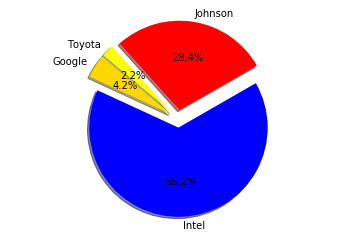

In [27]:
labels = 'Google','Intel','Johnson','Toyota'
sizes = [0.04234457, 0.65171018, 0.28371364, 0.02223161]
colors = ['gold','blue','red','yellow','orange','purple']
explode = (0.1,0.1,0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

<Figure size 7.2x7.2 with 0 Axes>

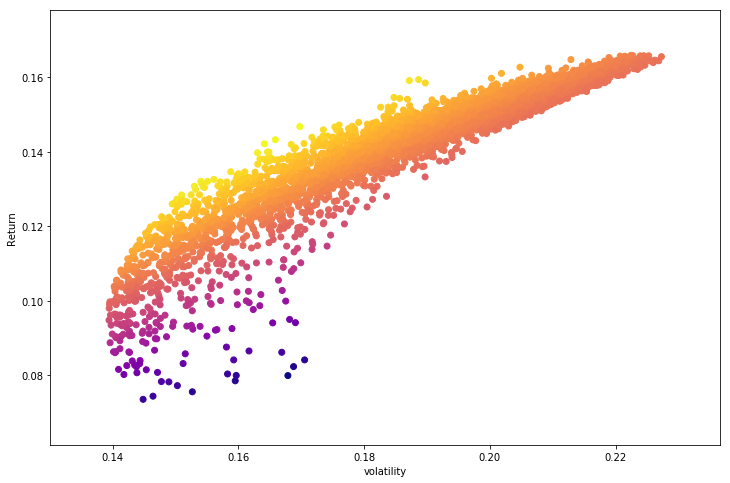

<Figure size 7.2x7.2 with 0 Axes>

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(StandardDeviation_arr,MeanReturn_arr,c=sharperatio_arr,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('volatility')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))



#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)

<Figure size 7.2x7.2 with 0 Axes>

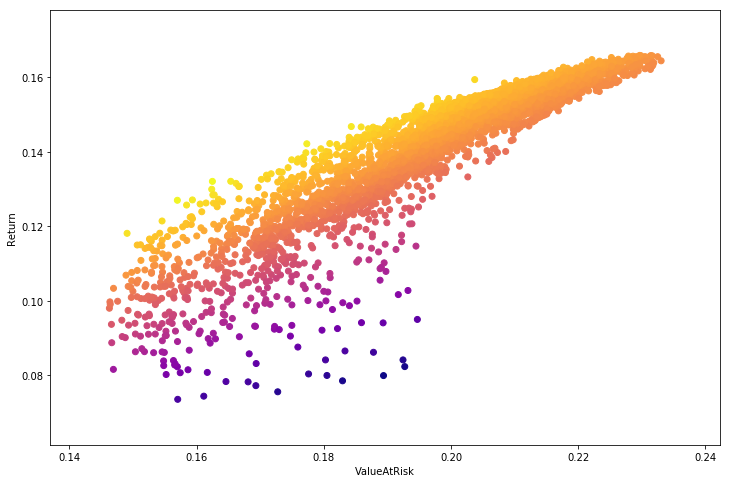

<Figure size 7.2x7.2 with 0 Axes>

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(ValueAtRisk_arr,MeanReturn_arr,c=var_mean_ratio,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('ValueAtRisk')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))

#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)

<Figure size 7.2x7.2 with 0 Axes>

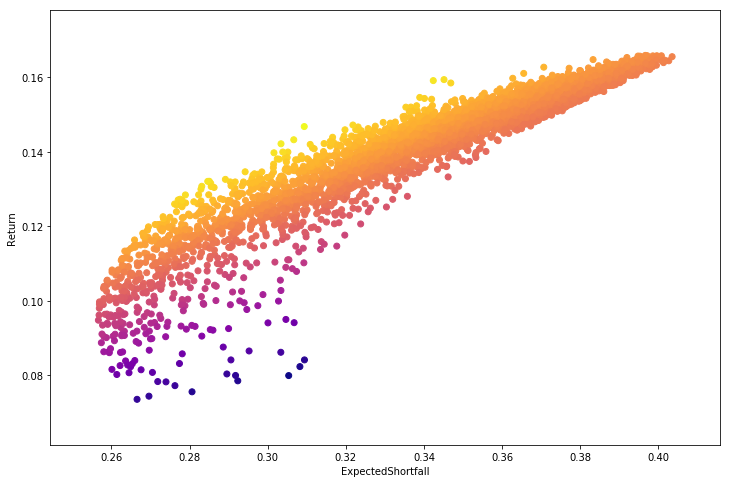

<Figure size 7.2x7.2 with 0 Axes>

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(ExpectedShortfall_arr,MeanReturn_arr,c=shortfall_mean_ratio,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('ExpectedShortfall')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))

#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)

In [31]:
#Generating stocks values for next year

In [32]:
T=1
mea=[0.000651,0.000703,0.000373,0.000219]
Goog_Int=0.439011
Goog_JJ=0.375379
Goog_Toy=0.424550
Int_JJ=0.355773
INT_Toy=0.403426
JJ_Toy=0.365957
cov=[[1,Goog_Int,Goog_JJ,Goog_Toy],[Goog_Int,1,Int_JJ,INT_Toy],[Goog_JJ,Int_JJ,1,JJ_Toy],[Goog_Toy,INT_Toy,JJ_Toy,1]]


#Google

mean_goog=0.000651
std_goog=0.014455
var_goog=std_goog**2
drift_goog=mean_goog-0.5*var_goog
s0_goog=1231.91
futureprice_goog=pd.DataFrame()

#Intel
mean_int=0.000703
std_int=0.015815
var_int=std_int**2
drift_int=mean_int-0.5*var_int
s0_int=56.7
futureprice_int=pd.DataFrame()

#jhonson and Jhonson
mean_jj=0.000373
std_jj=0.010024
var_jj=std_jj**2
drift_jj=mean_jj-0.5*var_jj
s0_jj=138.02
futureprice_jj=pd.DataFrame()

#Toyota

mean_toy=0.000219
std_toy=0.011721
var_toy=std_toy**2
drift_toy=mean_toy-0.5*var_toy
s0_toy=121.75
futureprice_toy=pd.DataFrame()


for i in range(5):
    G,I,J,T=np.random.multivariate_normal(mea,cov,1000).T
    dailyreturn_goog=np.exp(drift_goog+std_goog*G)
    dailyreturn_int=np.exp(drift_int+std_int*I)
    dailyreturn_jj=np.exp(drift_jj+std_jj*J)
    dailyreturn_toy=np.exp(drift_toy+std_toy*T)
    if i==1:
        temp_goog=+pd.DataFrame(s0_goog*dailyreturn_goog.cumprod())
        futureprice_goog=temp_goog
        temp_int=+pd.DataFrame(s0_int*dailyreturn_int.cumprod())
        futureprice_int=temp_int
        temp_jj=+pd.DataFrame(s0_jj*dailyreturn_jj.cumprod())
        futureprice_jj=temp_jj
        temp_toy=+pd.DataFrame(s0_toy*dailyreturn_toy.cumprod())
        futureprice_toy=temp_toy
    else:
        futureprice_goog=futureprice_goog+pd.DataFrame(s0_goog*dailyreturn_goog.cumprod())
        futureprice_int=futureprice_int+pd.DataFrame(s0_int*dailyreturn_int.cumprod())
        futureprice_jj=futureprice_jj+pd.DataFrame(s0_jj*dailyreturn_jj.cumprod())
        futureprice_toy=futureprice_toy+pd.DataFrame(s0_toy*dailyreturn_toy.cumprod())
        
futureprice_goog=futureprice_goog/10000
futureprice_int=futureprice_int/10000
futureprice_jj=futureprice_jj/10000
futureprice_toy=futureprice_toy/10000

In [35]:
futureprice_goog.head()

,0
0,0.493395
1,0.491645
2,0.491356
3,0.494885
4,0.492887


In [36]:
futureprice_int.head()

,0
0,0.022836
1,0.022781
2,0.023002
3,0.023157
4,0.023511


In [37]:
futureprice_jj.head()

,0
0,0.055401
1,0.055082
2,0.055319
3,0.055256
4,0.055498


In [38]:
futureprice_toy.head()

,0
0,0.048555
1,0.048229
2,0.048168
3,0.047807
4,0.048178


In [39]:
future_port=pd.concat([futureprice_goog,futureprice_int,futureprice_jj,futureprice_toy],axis=1)

In [40]:
future_port.columns=['Google','Intel','Johnson','Toyota']

In [41]:
future_port.corr()

,Google,Intel,Johnson,Toyota
Google,1.000000,0.972333,0.983163,0.883954
Intel,0.972333,1.000000,0.951126,0.909732
Johnson,0.983163,0.951126,1.000000,0.865639
Toyota,0.883954,0.909732,0.865639,1.000000


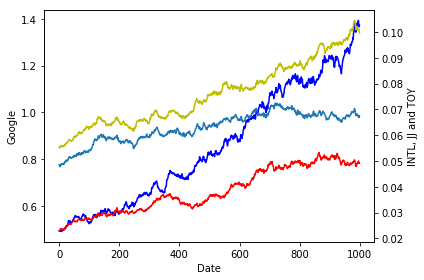

In [42]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Google')
ax1.plot(future_port['Google'],'b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('INTL, JJ and TOY')  # we already handled the x-label with ax1
ax2.plot(future_port['Intel'],'r')
ax2.plot(future_port['Johnson'],'y')
ax2.plot(future_port['Toyota'])
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [43]:
ValueAtRisk=[]
ExpectedShortfall=[]
MeanReturn=[]
StandardDeviation=[]

number_port=5000
all_weights=np.zeros((number_port,len(portfolio.columns)))
for i in range(number_port):
    #weights
    weights=np.array(np.random.random(4))
    #rebalance weights
    weights=weights/np.sum(weights)
    all_weights[i,:]=weights
    x=weights*future_port
    x['portfoliovalue']=x['Google']+x['Intel']+x['Johnson']+x['Toyota']
    x['dailyreturn']=np.log(x['portfoliovalue']/x['portfoliovalue'].shift(1))
    y=x['dailyreturn'].sort_values()
    ValueAtRisk.append(y.quantile(0.1))
    ES=(y<y.quantile(0.1))
    ExpectedShortfall.append(y[ES].mean())
    MeanReturn.append(y.mean())
    StandardDeviation.append(y.std())
    

In [45]:
ValueAtRisk_arr=np.array(ValueAtRisk)*(-1)*np.sqrt(252)
ExpectedShortfall_arr=np.array(ExpectedShortfall)*(-1)*np.sqrt(252)
MeanReturn_arr=np.array(MeanReturn)*252
StandardDeviation_arr=np.array(StandardDeviation)*np.sqrt(252)

In [46]:
 sharperatio_arr1=MeanReturn_arr/StandardDeviation_arr

In [47]:
sharperatio_arr1.max()


2.4345080869694895

In [48]:
sharperatio_arr1.argmax()

2174

In [49]:
all_weights[sharperatio_arr1.argmax(),:]

array([0.06740244, 0.34520375, 0.55048469, 0.03690912])

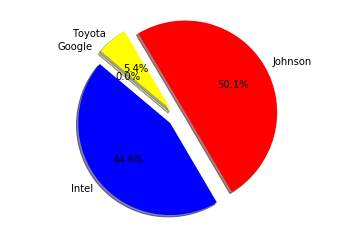

In [50]:
labels = 'Google','Intel','Johnson','Toyota'
sizes = [6.85471219e-05, 4.45579131e-01, 5.00644966e-01, 5.37073557e-02]
colors = ['gold','blue','red','yellow','orange','purple']
explode = (0.1,0.1,0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [51]:
 sharperatioVAR_arr=MeanReturn_arr/ValueAtRisk_arr

In [52]:
sharperatioVAR_arr.max()


2.2786951472023715

In [53]:
sharperatioVAR_arr.argmax()

767

In [54]:
all_weights[sharperatioVAR_arr.argmax(),:]

array([0.04171419, 0.44467698, 0.48965878, 0.02395005])

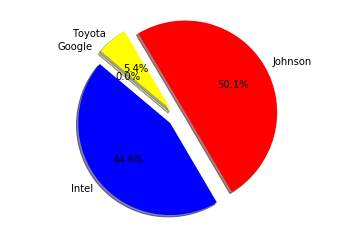

In [55]:
labels = 'Google','Intel','Johnson','Toyota'
sizes = [6.85471219e-05, 4.45579131e-01, 5.00644966e-01, 5.37073557e-02]
colors = ['gold','blue','red','yellow','orange','purple']
explode = (0.1,0.1,0.1,0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [56]:
 sharperatioES_arr=MeanReturn_arr/ExpectedShortfall_arr

In [57]:
sharperatioES_arr.max()


1.517063461679358

In [58]:
n=sharperatioES_arr.tolist()

In [59]:
n.pop(3955)

1.4154594866980075

In [60]:
sharperatioES_arr=np.array(n)

In [61]:
sharperatioES_arr.max()


1.517063461679358

In [62]:
sharperatioES_arr.argmax()

34

In [63]:
all_weights[3941,:]

array([0.11160516, 0.08163016, 0.3677477 , 0.43901698])

<Figure size 7.2x7.2 with 0 Axes>

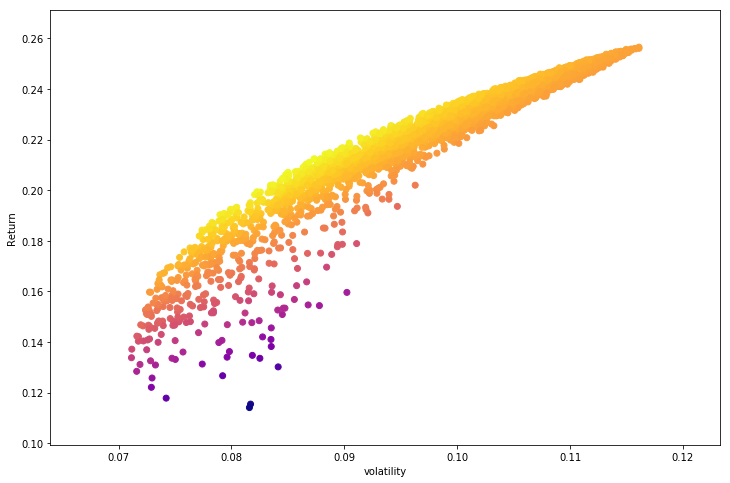

<Figure size 7.2x7.2 with 0 Axes>

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(StandardDeviation_arr,MeanReturn_arr,c=sharperatio_arr1,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('volatility')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))

#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)

<Figure size 7.2x7.2 with 0 Axes>

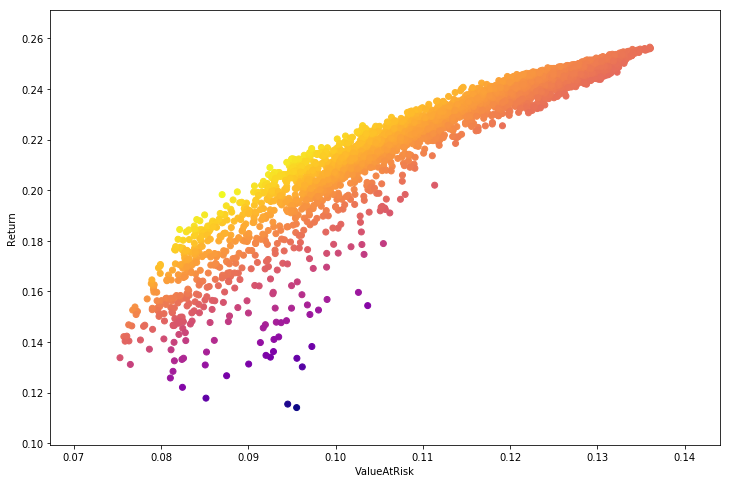

<Figure size 7.2x7.2 with 0 Axes>

In [65]:
plt.figure(figsize=(12,8))
plt.scatter(ValueAtRisk_arr,MeanReturn_arr,c=sharperatioVAR_arr,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('ValueAtRisk')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))

#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)

<Figure size 7.2x7.2 with 0 Axes>

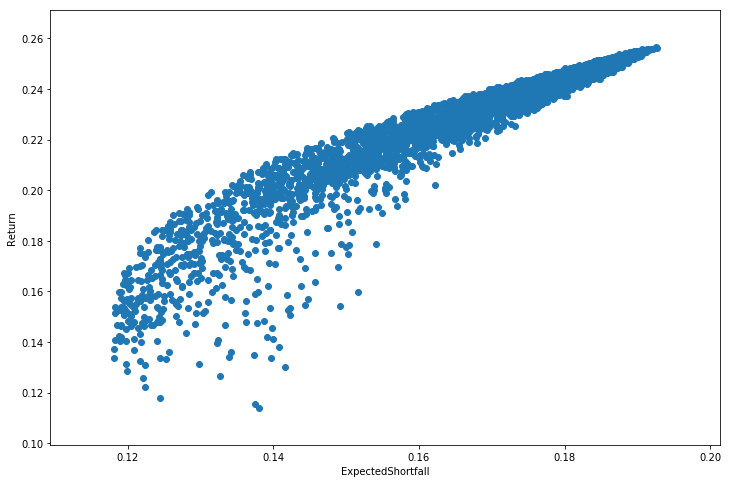

<Figure size 7.2x7.2 with 0 Axes>

In [66]:
plt.figure(figsize=(12,8))
plt.scatter(ExpectedShortfall_arr,MeanReturn_arr,cmap='plasma')
#plt.colorbar(label='sharperatio')
plt.xlabel('ExpectedShortfall')
plt.ylabel('Return')
plt.figure(figsize=(0.1,0.1))

#plt.scatter(max_sr_vol,max_sr_ret,c='red',edgecolors='black',s=50)